Interact?

In [ ]:
from lightkurve import search_tesscut
tc = search_tesscut("260.621 -37.449").download()

In [ ]:
# sel = (tc.time > 1627) & (tc.time < 1638) & (tc.time > 1643)

In [ ]:
tc.interact()

Multiplanet search?

In [27]:
from astropy.io import fits
import numpy as np, matplotlib.pyplot as plt
%matplotlib inline

In [36]:
hdul = fits.open('hlsp_cdips_tess_ffi_gaiatwo0005974331982990013696-0012-cam1-ccd3_tess_v01_llc.fits')

In [48]:
d = hdul[1].data

In [58]:
time, mag = d['TMID_BJD'], d['IRM1']
from cdips.plotting.vetting_pdf import _given_mag_get_flux
flux = _given_mag_get_flux(mag)
sel = (
    (time > 2457000+1628)
    & ~((time < 2457000+1641) & (time > 2457000+1639))
    & ~((time < 2457000+1633) & (time > 2457000+1632.5))
) # bad otherwise
time, flux = time[sel], flux[sel]
from wotan import slide_clip
clipped_flux = slide_clip(time, flux, window_length=1, low=4, high=2, method='mad', center='median' )

/Users/luke/local/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys
/Users/luke/local/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys


Segment 1 of 3
Iteration: 1 Rejected outliers: 2
Iteration: 2 Rejected outliers: 1
Iteration: 3 Rejected outliers: 1
Iteration: 4 Rejected outliers: 0
Converged.
Segment 2 of 3
Iteration: 1 Rejected outliers: 3
Iteration: 2 Rejected outliers: 2
Iteration: 3 Rejected outliers: 2
Iteration: 4 Rejected outliers: 1
Iteration: 5 Rejected outliers: 1
Iteration: 6 Rejected outliers: 1
Iteration: 7 Rejected outliers: 1
Iteration: 8 Rejected outliers: 0
Converged.
Segment 3 of 3
Iteration: 1 Rejected outliers: 4
Iteration: 2 Rejected outliers: 3
Iteration: 3 Rejected outliers: 1
Iteration: 4 Rejected outliers: 0
Converged.


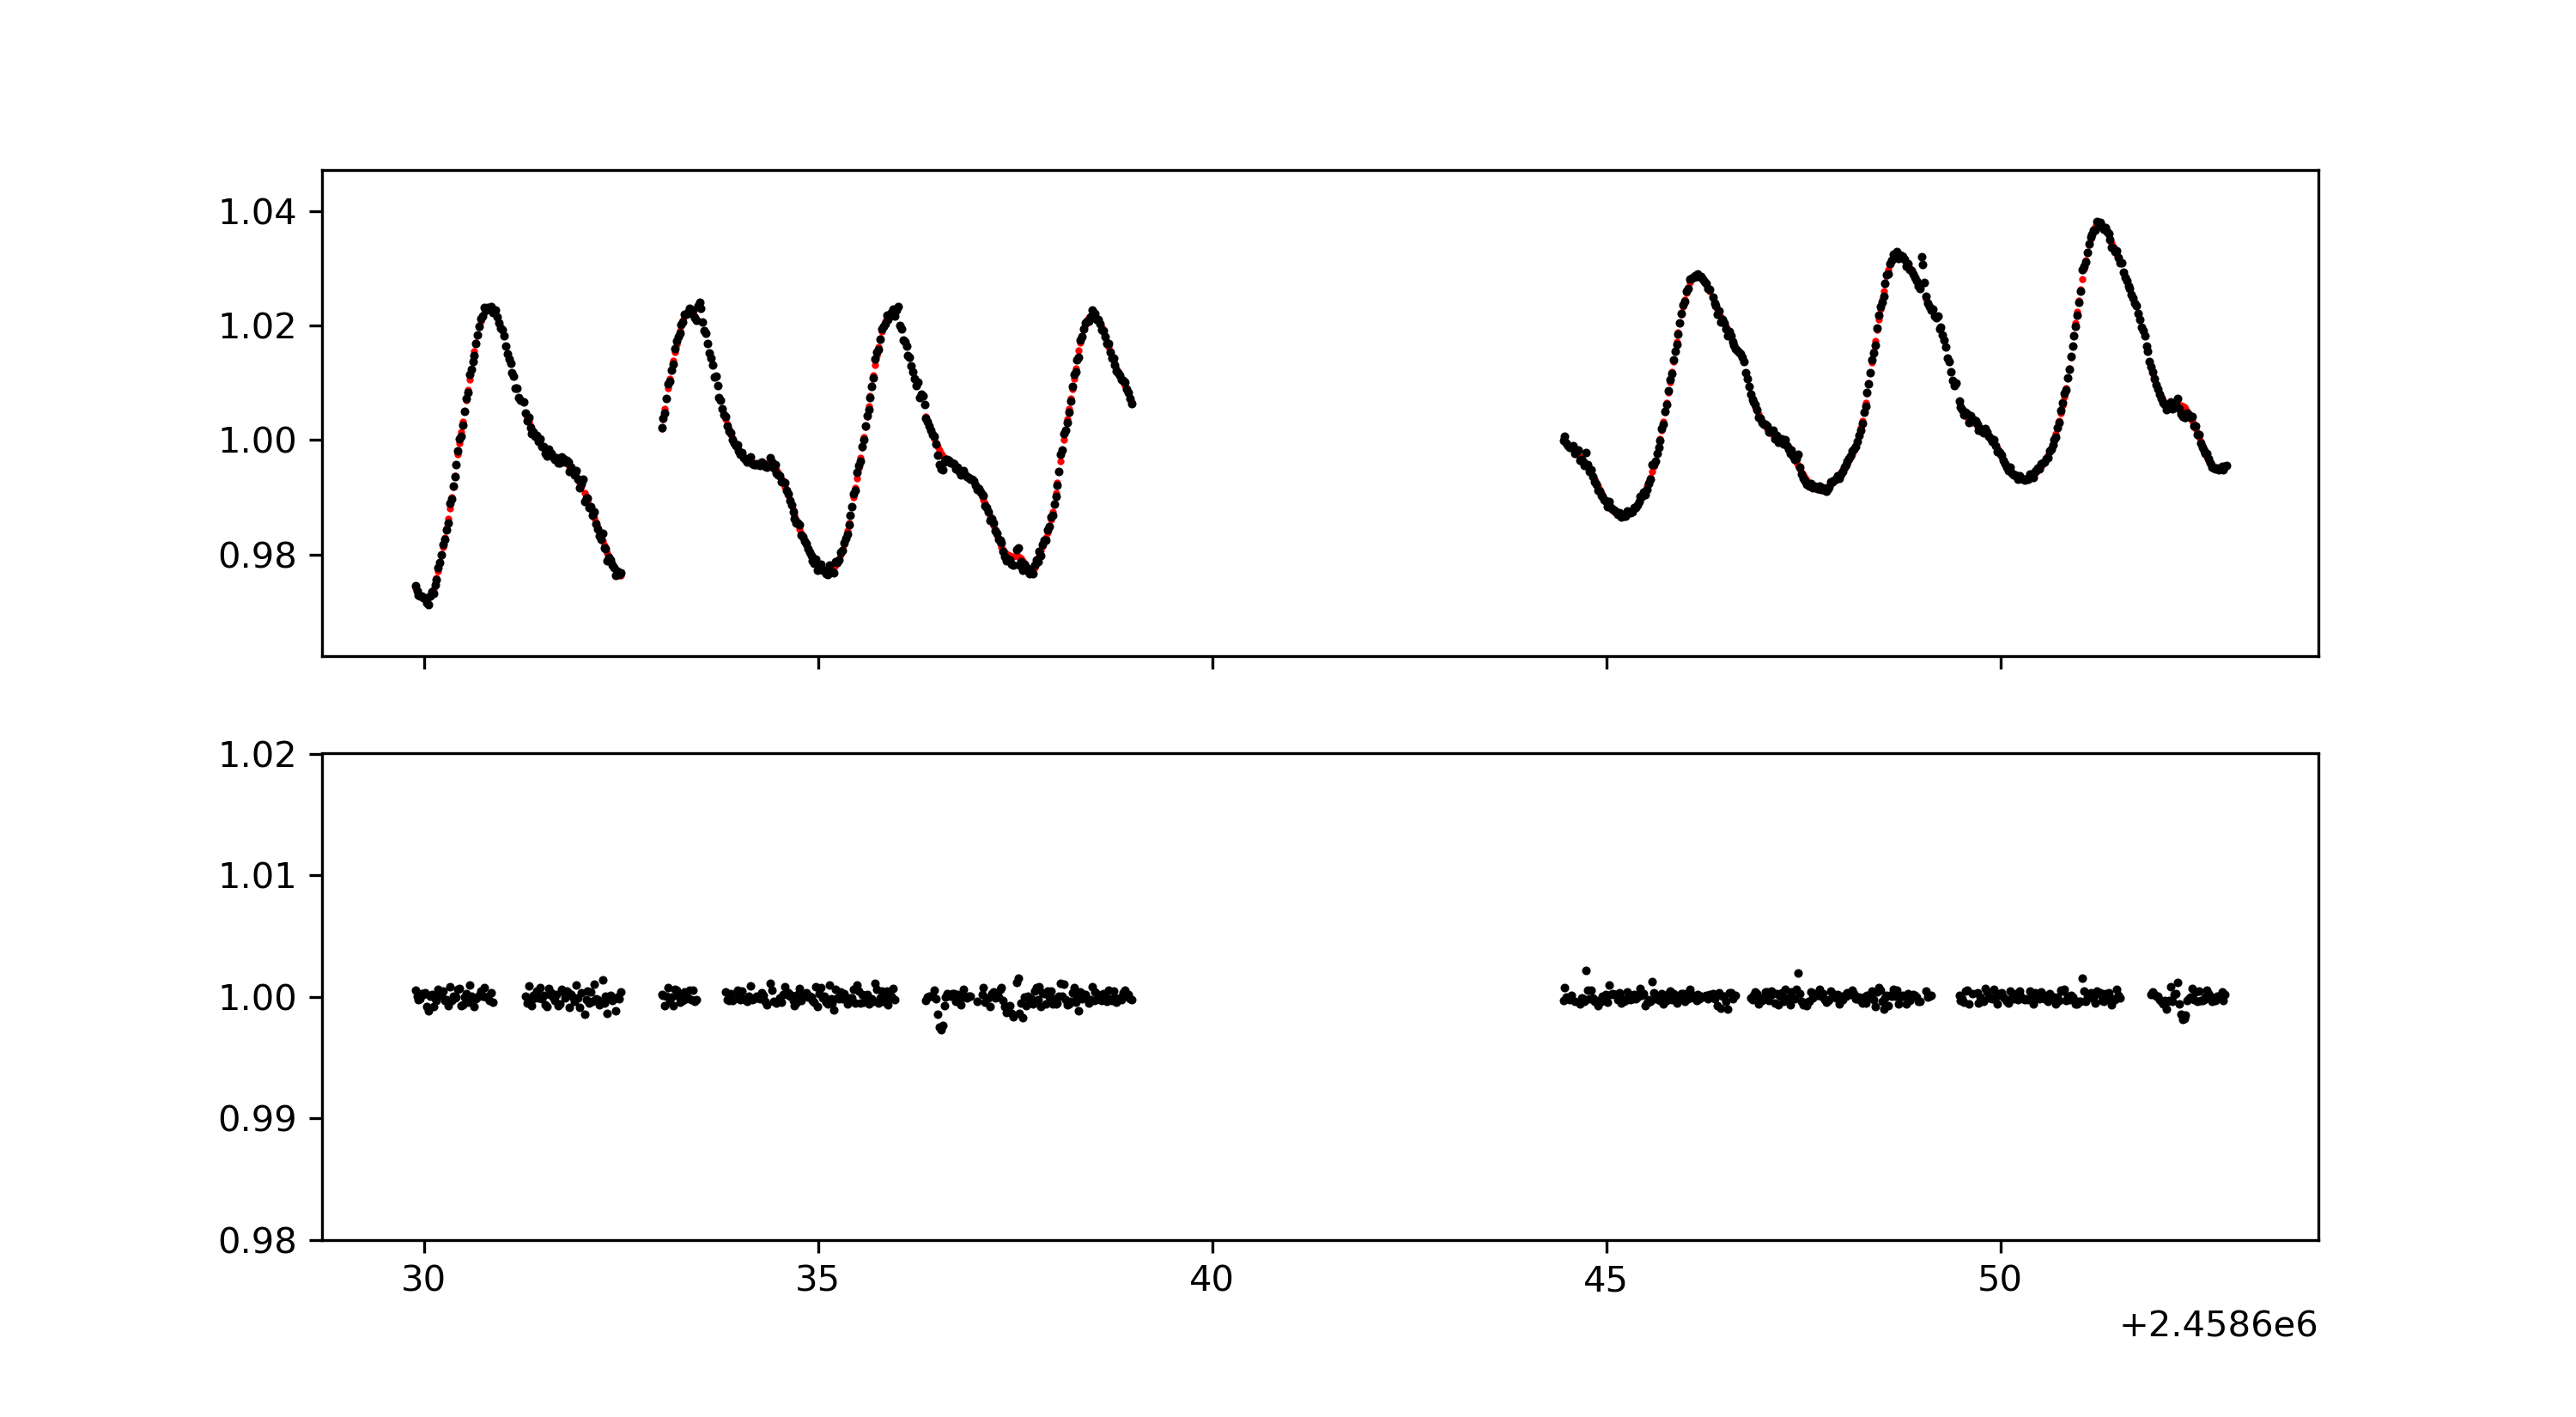

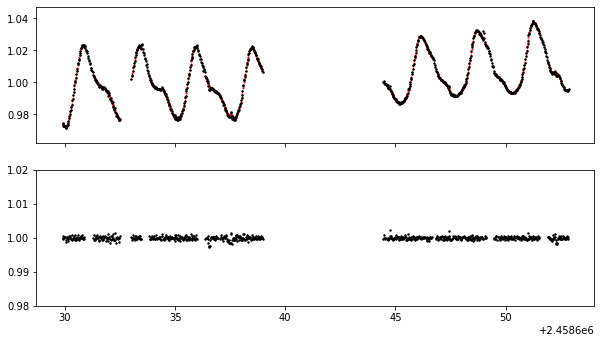

In [59]:
from cdips.lcproc.detrend import detrend_flux
from copy import deepcopy
from IPython.display import Image

flat_flux, trend_flux = detrend_flux(time, clipped_flux)

plt.close('all')
fig, axs = plt.subplots(figsize=(10,5.5), nrows=2, sharex=True)
axs[0].scatter(time, flux, c='k', s=2, zorder=2)
axs[0].scatter(time, trend_flux, c='r', s=1, zorder=1)
axs[1].scatter(time, flat_flux, c='k', s=2, zorder=2)
axs[1].set_ylim([0.98, 1.02])
plt.savefig('TIC198262850_explore_cdipsflux.png', dpi=300)
Image(filename='TIC198262850_explore_cdipsflux.png')

Multiplanet search?

In [1]:
from astropy.io import fits
import numpy as np, matplotlib.pyplot as plt
%matplotlib inline

In [2]:
hdul = fits.open('hlsp_eleanor_tess_ffi_tic198262850_s12_tess_v1.0.3_lc.fits')

In [3]:
d = hdul[1].data

In [4]:
time, flux, qual = d['TIME'], d['CORR_FLUX'], d['QUALITY']
sel = (time > 1628) & ~((time < 1641) & (time > 1639)) & (qual == 0) # bad otherwise
time, flux = time[sel], flux[sel]

Segment 1 of 2
Iteration: 1 Rejected outliers: 4
Iteration: 2 Rejected outliers: 1
Iteration: 3 Rejected outliers: 0
Converged.
Segment 2 of 2
Iteration: 1 Rejected outliers: 13
Iteration: 2 Rejected outliers: 7
Iteration: 3 Rejected outliers: 2
Iteration: 4 Rejected outliers: 0
Converged.


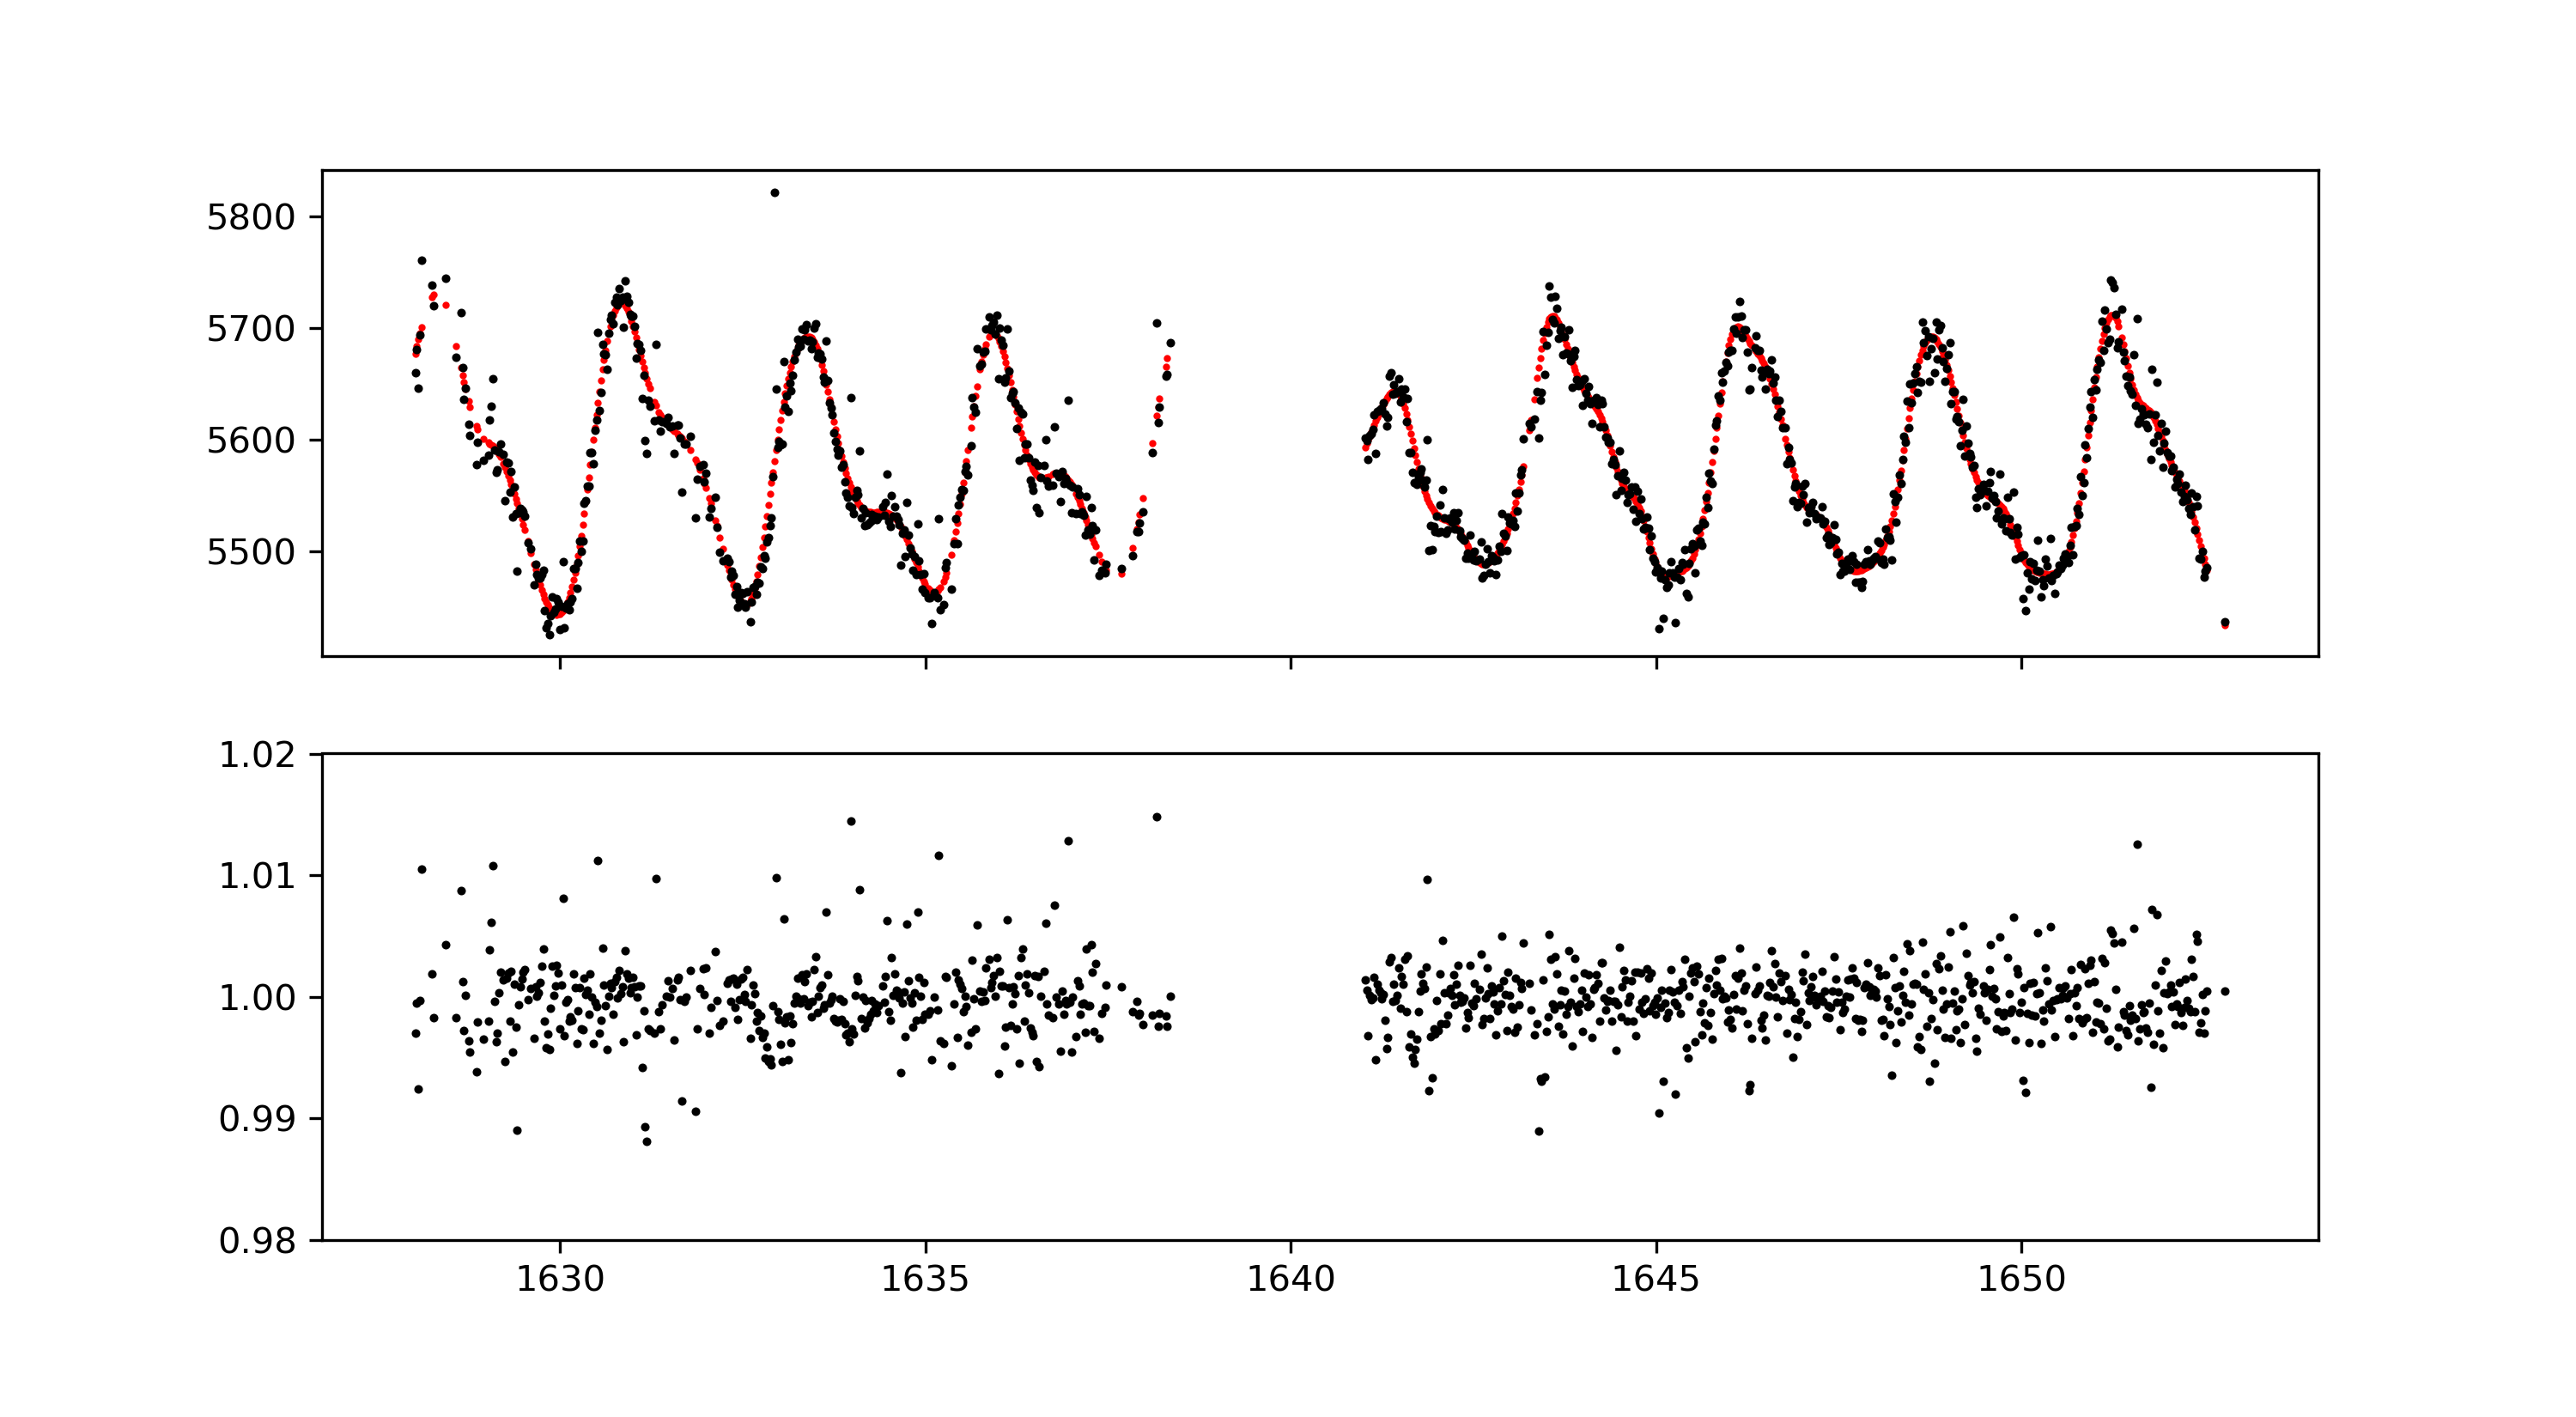

In [5]:
from cdips.lcproc.detrend import detrend_flux
from copy import deepcopy
from IPython.display import Image

flat_flux, trend_flux = detrend_flux(time, flux)

plt.close('all')
fig, axs = plt.subplots(figsize=(10,5.5), nrows=2, sharex=True)
axs[0].scatter(time, flux, c='k', s=2, zorder=2)
axs[0].scatter(time, trend_flux, c='r', s=1, zorder=1)
axs[1].scatter(time, flat_flux, c='k', s=2, zorder=2)
axs[1].set_ylim([0.98, 1.02])
plt.savefig('TIC198262850_explore_corrflux.png', dpi=300)
Image(filename='TIC198262850_explore_corrflux.png')


  0%|          | 0/1531 periods | 00:00<?

Transit Least Squares TLS 1.0.24 (21 November 2019)
Creating model cache for 25 durations
Searching 937 data points, 1531 periods from 1.0 to 8.983 days
Using all 16 CPU threads


100%|██████████| 1531/1531 periods | 00:03<00:00
/Users/luke/local/miniconda3/envs/py37/lib/python3.7/site-packages/transitleastsquares/main.py:404: UserWarning: 1 of 3 transits without data. The true period may be twice the given period.
  warnings.warn(text)


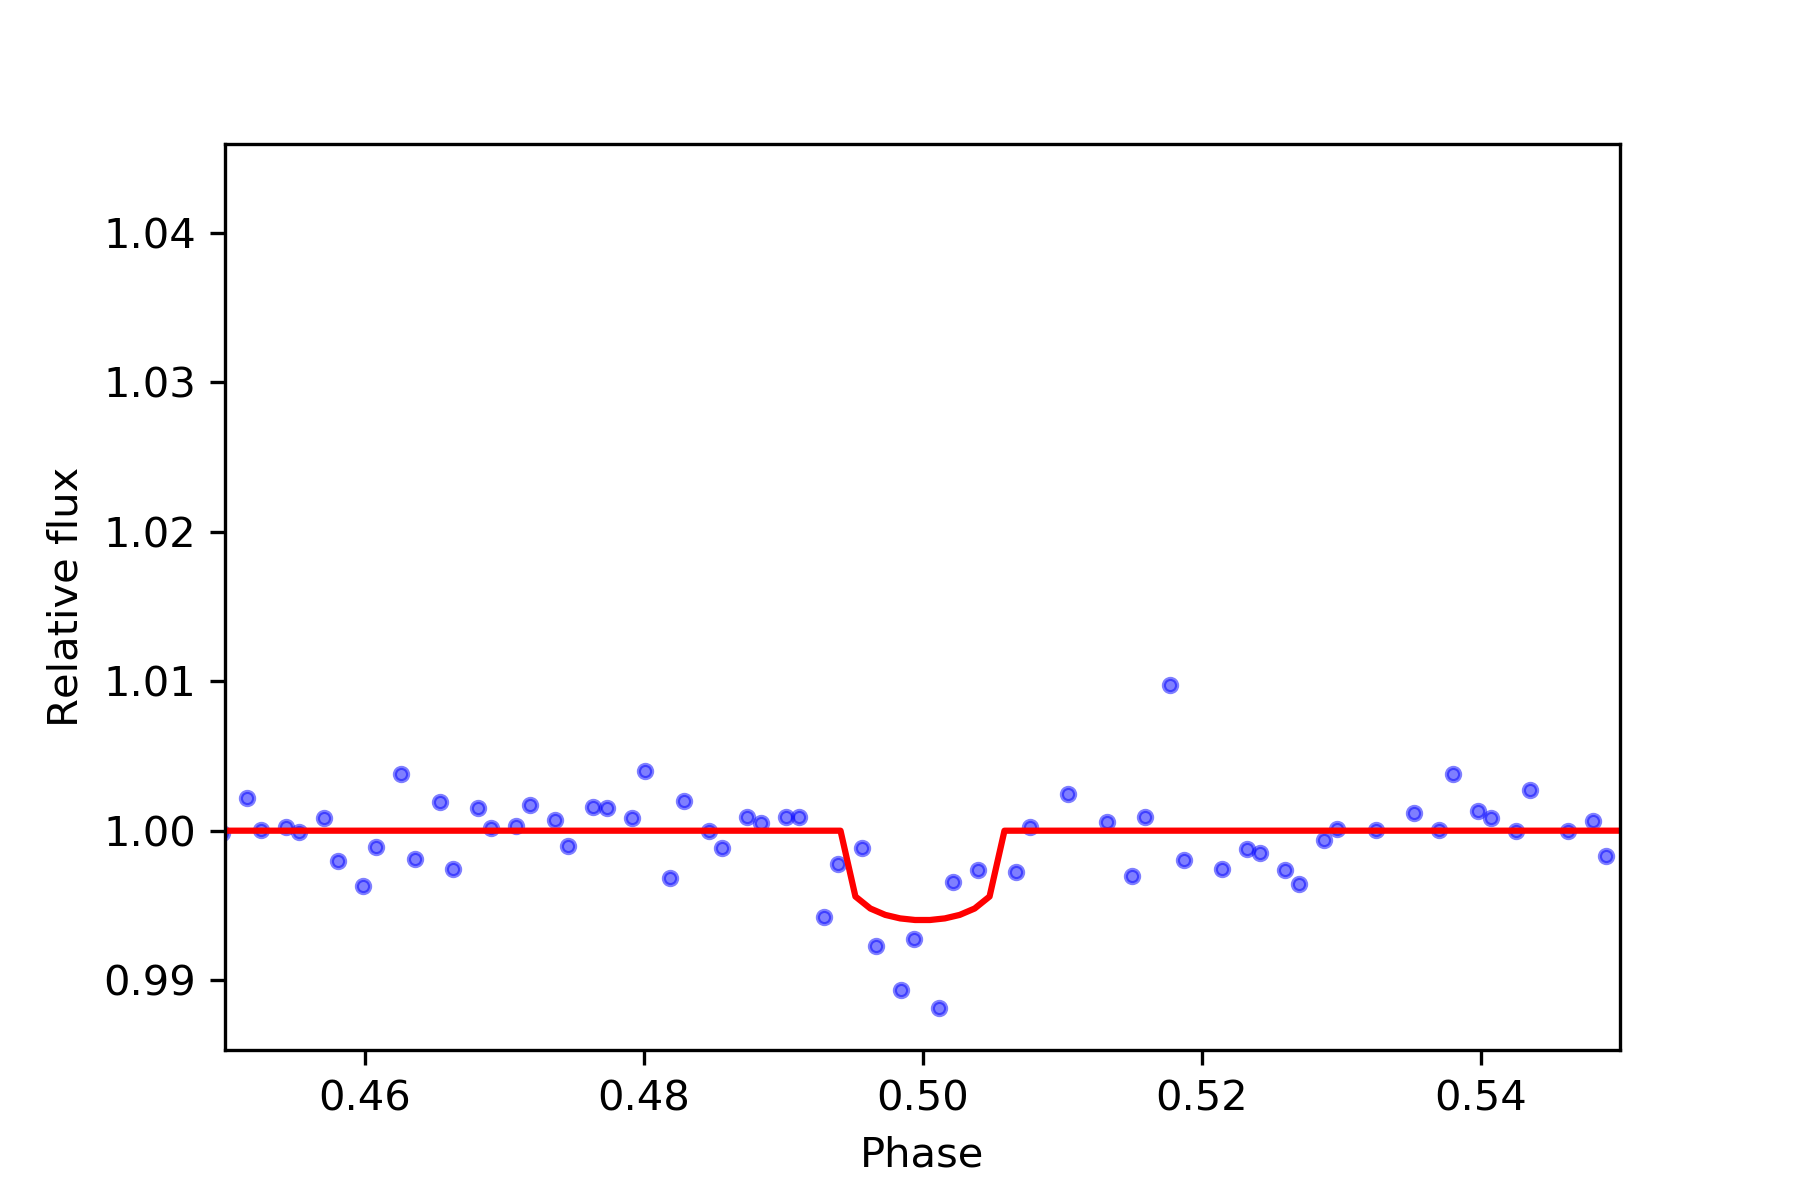

In [6]:
from transitleastsquares import transitleastsquares

model = transitleastsquares(time, flat_flux)
results = model.power(period_min=1, period_max=9)
plt.figure()
plt.plot(
    results.model_folded_phase,
    results.model_folded_model,
    color='red')
plt.scatter(
    results.folded_phase,
    results.folded_y,
    color='blue',
    s=10,
    alpha=0.5,
    zorder=2)
plt.xlim(0.45, 0.55)
plt.xlabel('Phase')
plt.ylabel('Relative flux')
plt.savefig('TIC198262850_vs_phase_main_transit.png', dpi=300);
Image(filename='TIC198262850_vs_phase_main_transit.png')

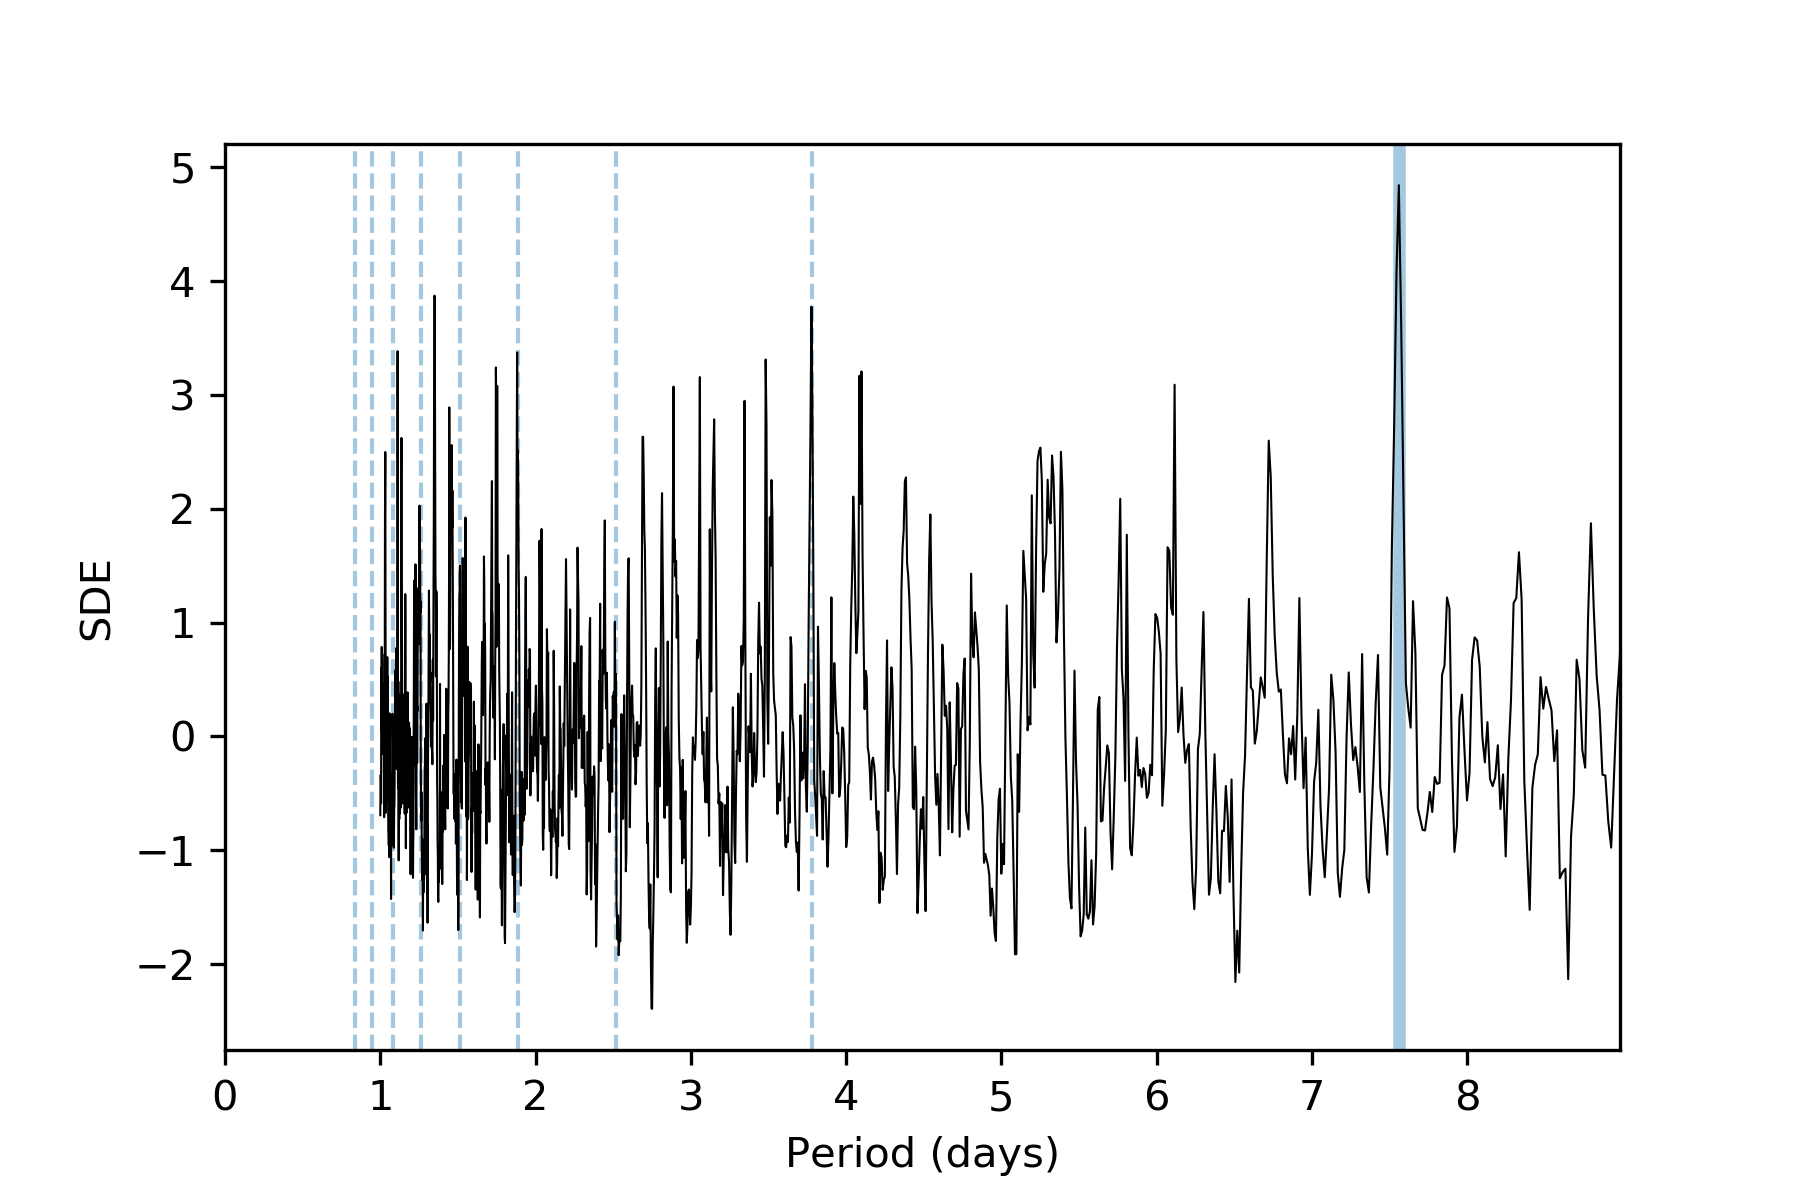

In [7]:
plt.figure()
ax = plt.gca()
ax.axvline(results.period, alpha=0.4, lw=3)
plt.xlim(np.min(results.periods), np.max(results.periods))
for n in range(2, 10):
    ax.axvline(n*results.period, alpha=0.4, lw=1, linestyle="dashed")
    ax.axvline(results.period / n, alpha=0.4, lw=1, linestyle="dashed")
plt.ylabel(r'SDE')
plt.xlabel('Period (days)')
plt.plot(results.periods, results.power, color='black', lw=0.5)
plt.xlim(0, max(results.periods))
plt.savefig('TIC198262850_tls_spectrum.png', dpi=300)
Image(filename='TIC198262850_tls_spectrum.png')

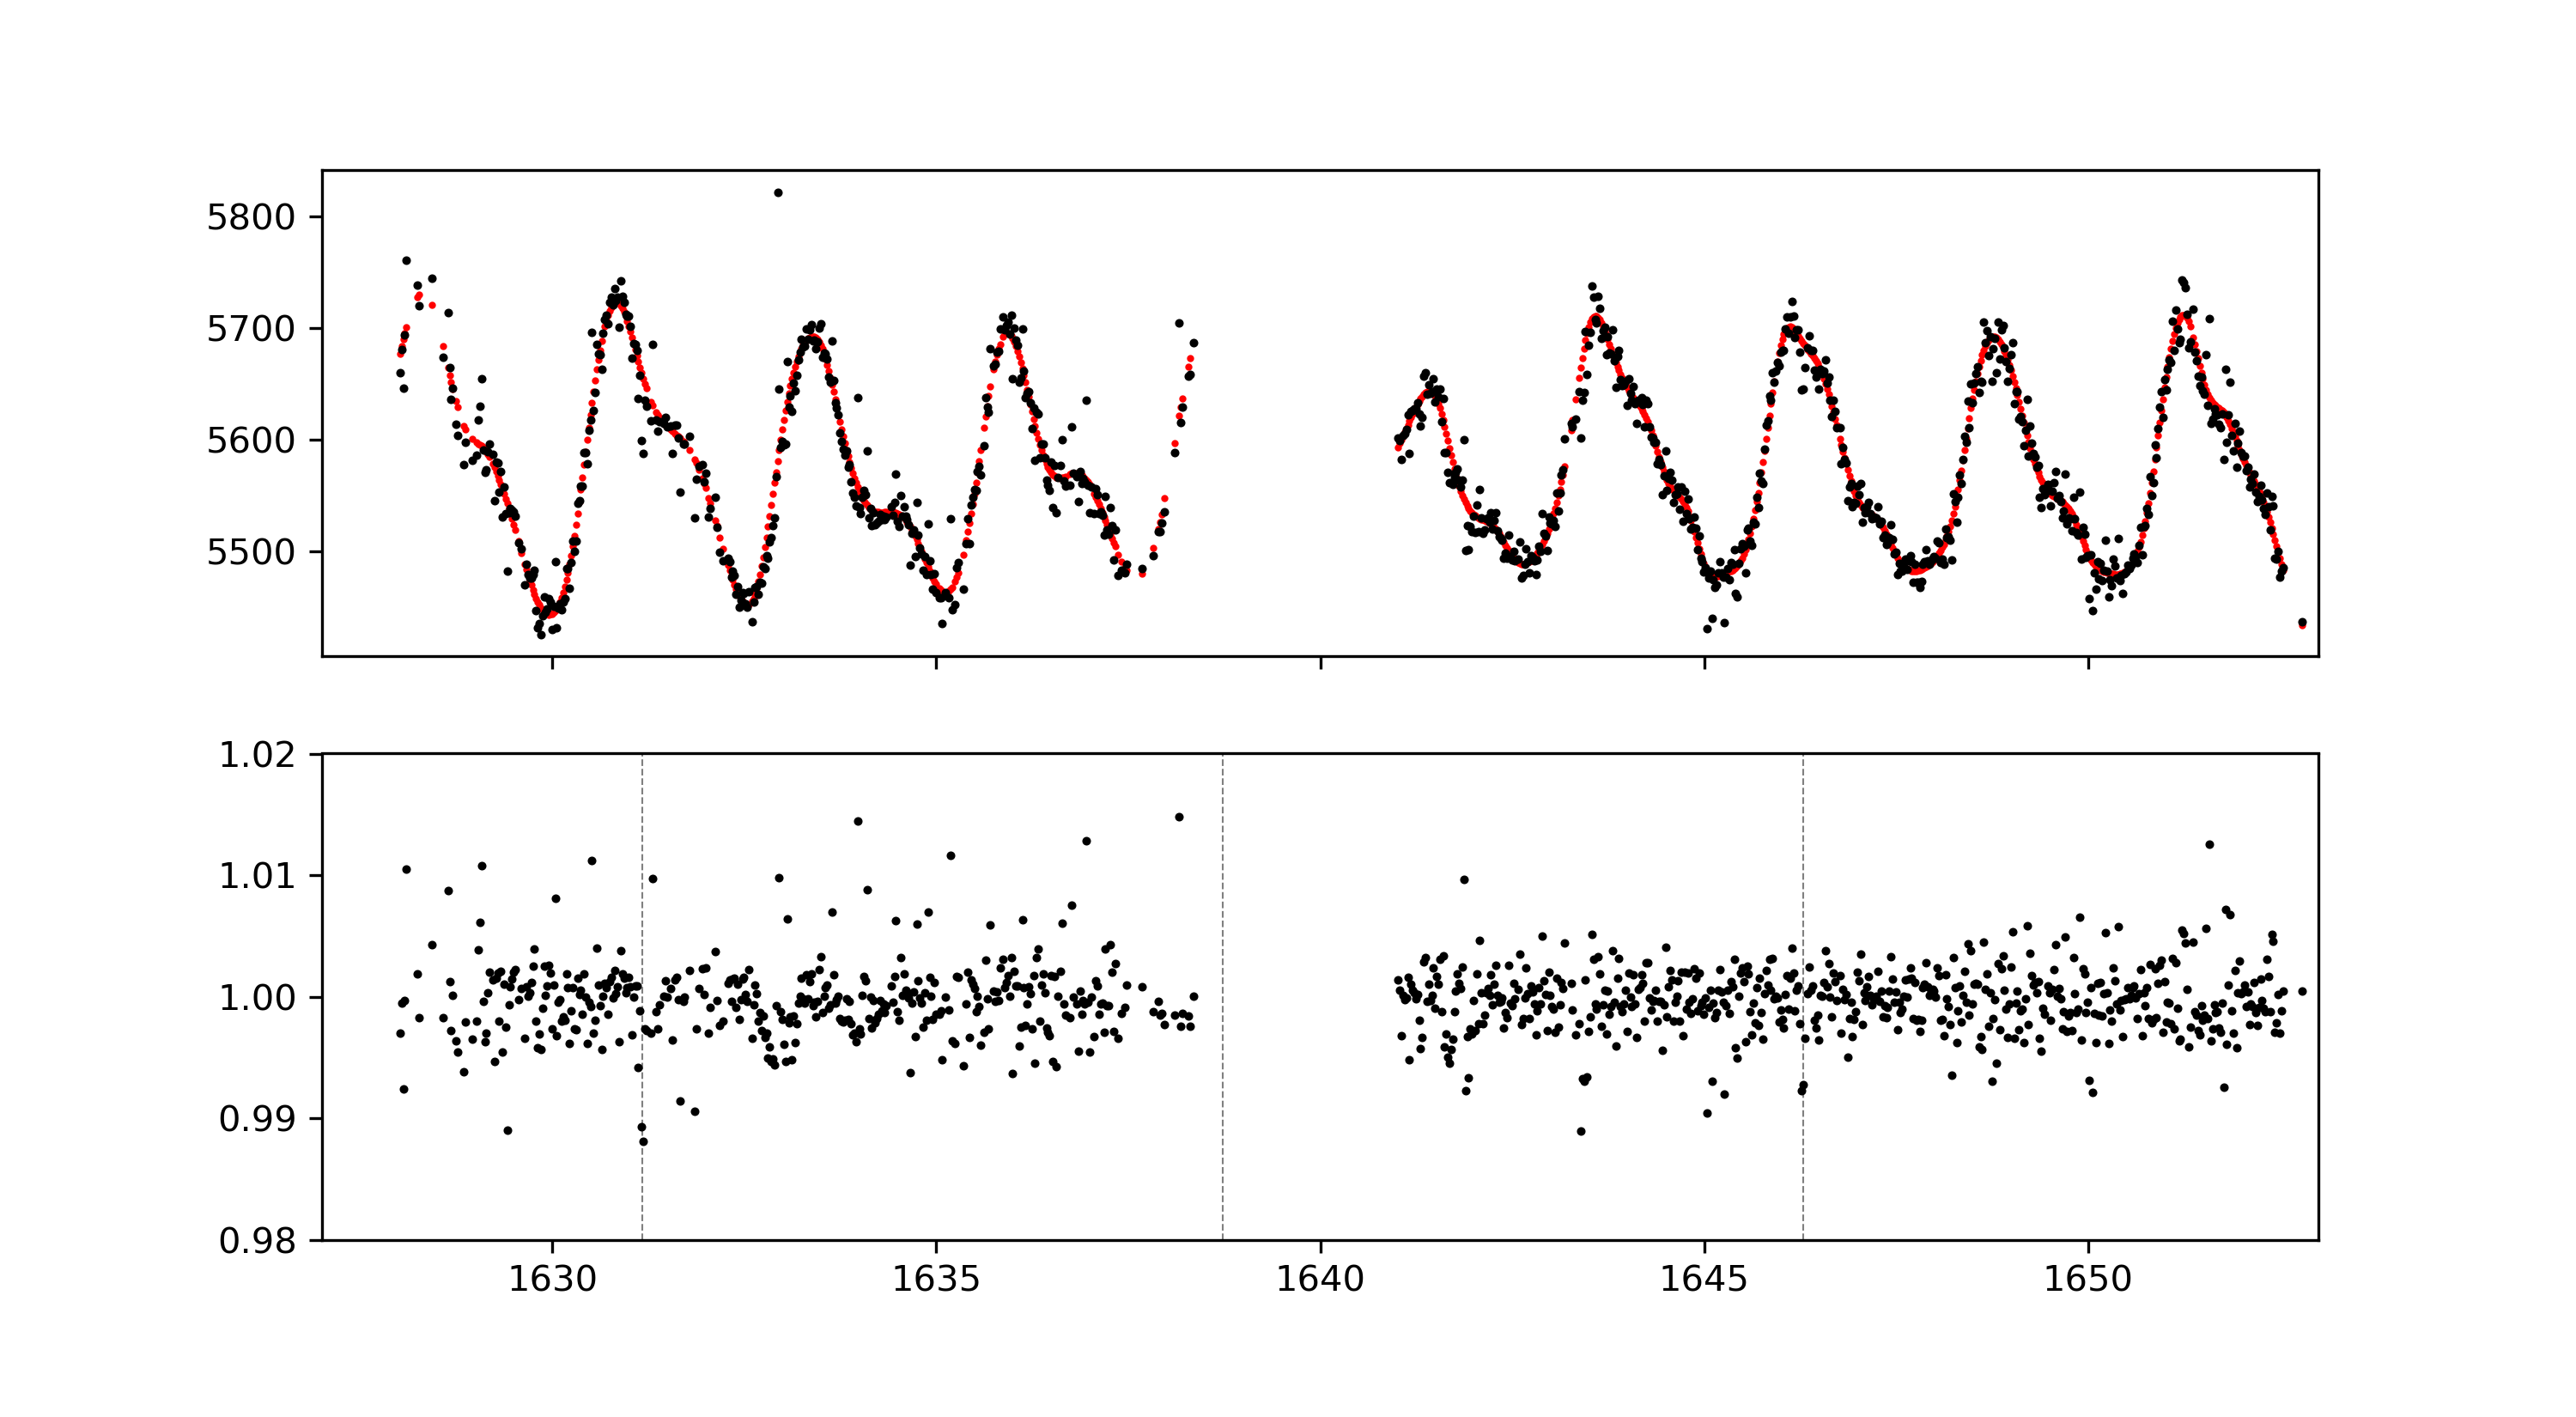

In [8]:
P = results.period
t0 = results.T0
epochs = np.arange(-100,100,1)
t_tra = t0 + epochs*P

plt.close('all')
fig, axs = plt.subplots(figsize=(10,5.5), nrows=2, sharex=True)
axs[0].scatter(time, flux, c='k', s=2, zorder=2)
axs[0].scatter(time, trend_flux, c='r', s=1, zorder=1)
axs[1].scatter(time, flat_flux, c='k', s=2, zorder=2)
axs[1].vlines(t_tra, 0.98, 1.02, colors='gray', linestyles='--', zorder=-3, linewidths=0.5)
axs[1].set_ylim([0.98, 1.02])
for a in axs:
    a.set_xlim([1627,1653])
plt.savefig('TIC198262850_explore_corrflux_lines.png', dpi=300)
Image(filename='TIC198262850_explore_corrflux_lines.png')


In [9]:
flux = deepcopy(flat_flux)

In [10]:
# mask and continue

from transitleastsquares import transit_mask, cleaned_array
intransit = transit_mask(time, results.period, 2*results.duration, results.T0)
y_second_run = flux[~intransit]
t_second_run = time[~intransit]
t_second_run, y_second_run = cleaned_array(t_second_run, y_second_run)

plt.close()

plt.close('all')
fig, ax = plt.subplots(figsize=(10,3))
ax.scatter(t_second_run, y_second_run, c='k', s=2, zorder=2)
plt.savefig('PCA1_vs_flux_after_masking.png', dpi=300);

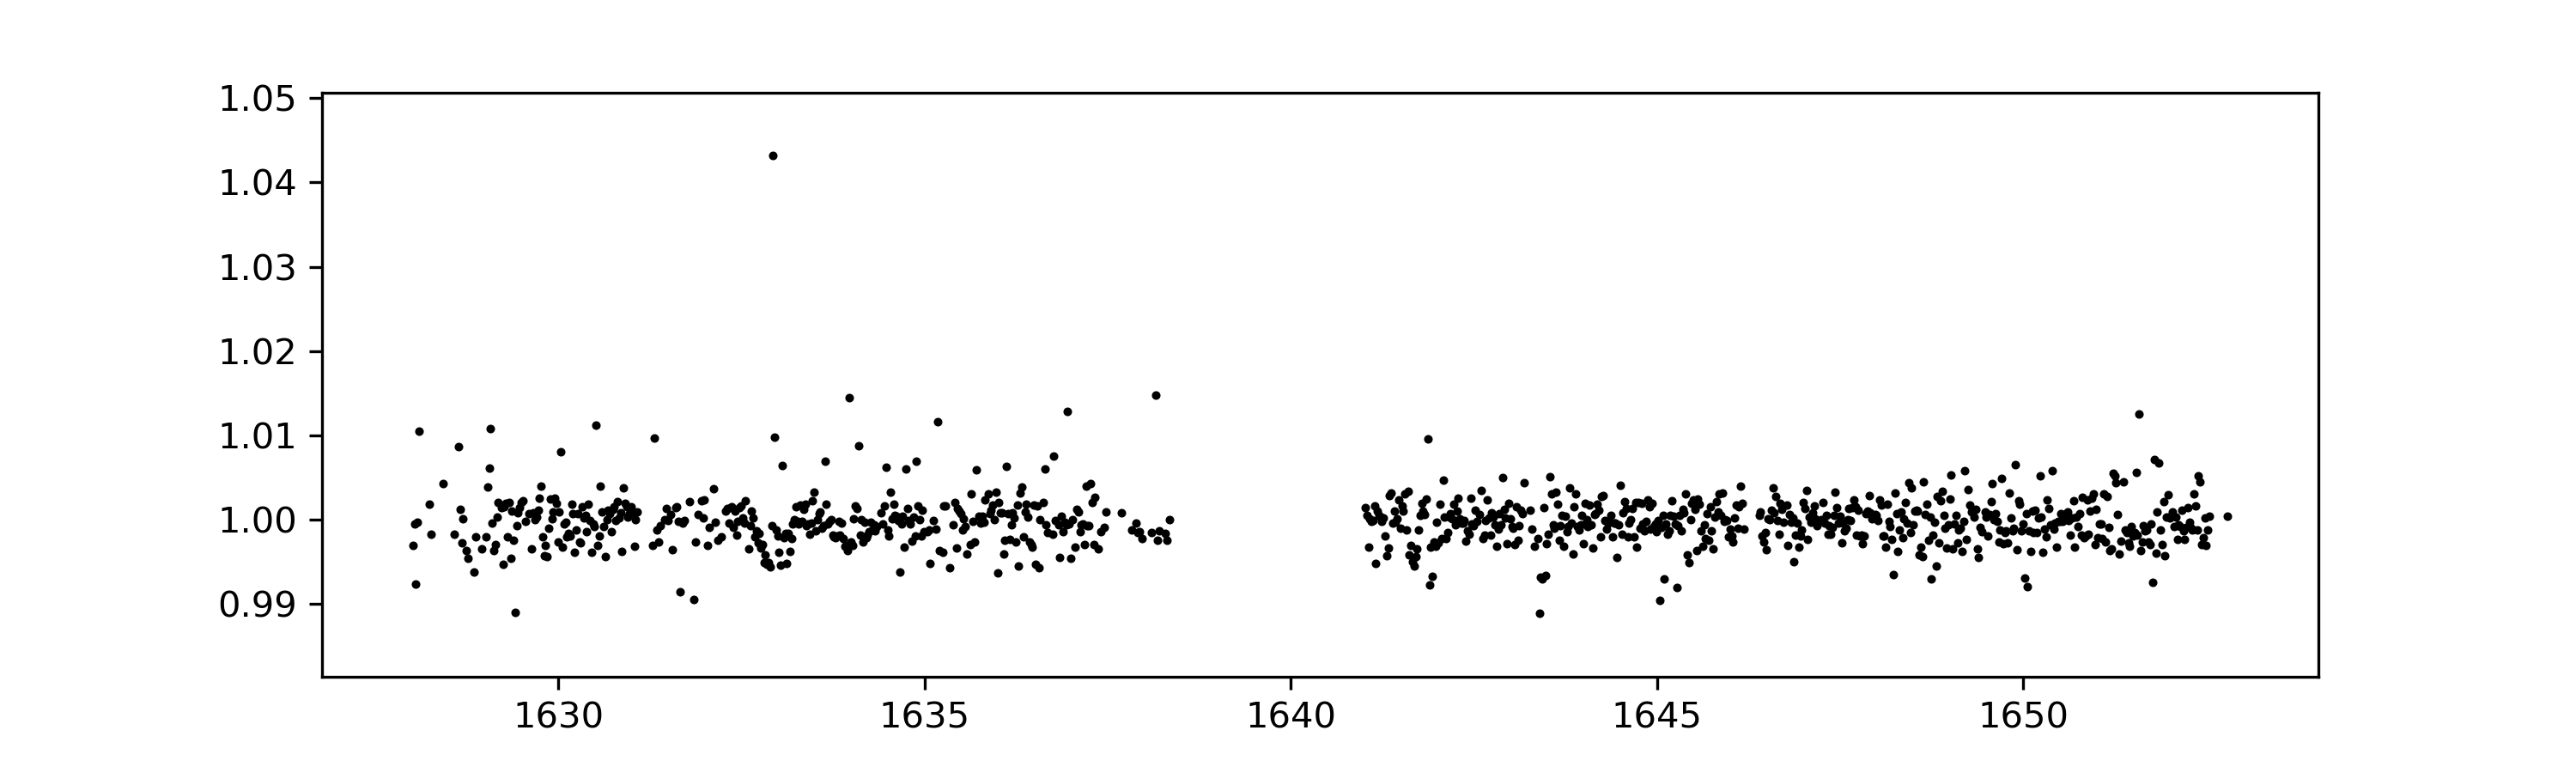

In [16]:
Image(filename='PCA1_vs_flux_after_masking.png')

In [11]:
model_second_run = transitleastsquares(t_second_run, y_second_run)
results_second_run = model_second_run.power()
plt.figure()
ax = plt.gca()
ax.axvline(results_second_run.period, alpha=0.4, lw=3)
plt.xlim(np.min(results_second_run.periods), np.max(results_second_run.periods))
for n in range(2, 10):
    ax.axvline(n*results_second_run.period, alpha=0.4, lw=1, linestyle="dashed")
    ax.axvline(results_second_run.period / n, alpha=0.4, lw=1, linestyle="dashed")
plt.ylabel(r'SDE')
plt.xlabel('Period (days)')
plt.plot(results_second_run.periods, results_second_run.power, color='black', lw=0.5)
plt.xlim(0, max(results_second_run.periods))
plt.savefig('tls_spectrum_after_masking.png', dpi=300);

  0%|          | 0/2220 periods | 00:00<?

Transit Least Squares TLS 1.0.24 (21 November 2019)
Creating model cache for 27 durations
Searching 922 data points, 2220 periods from 0.601 to 12.386 days
Using all 16 CPU threads


100%|██████████| 2220/2220 periods | 00:03<00:00 


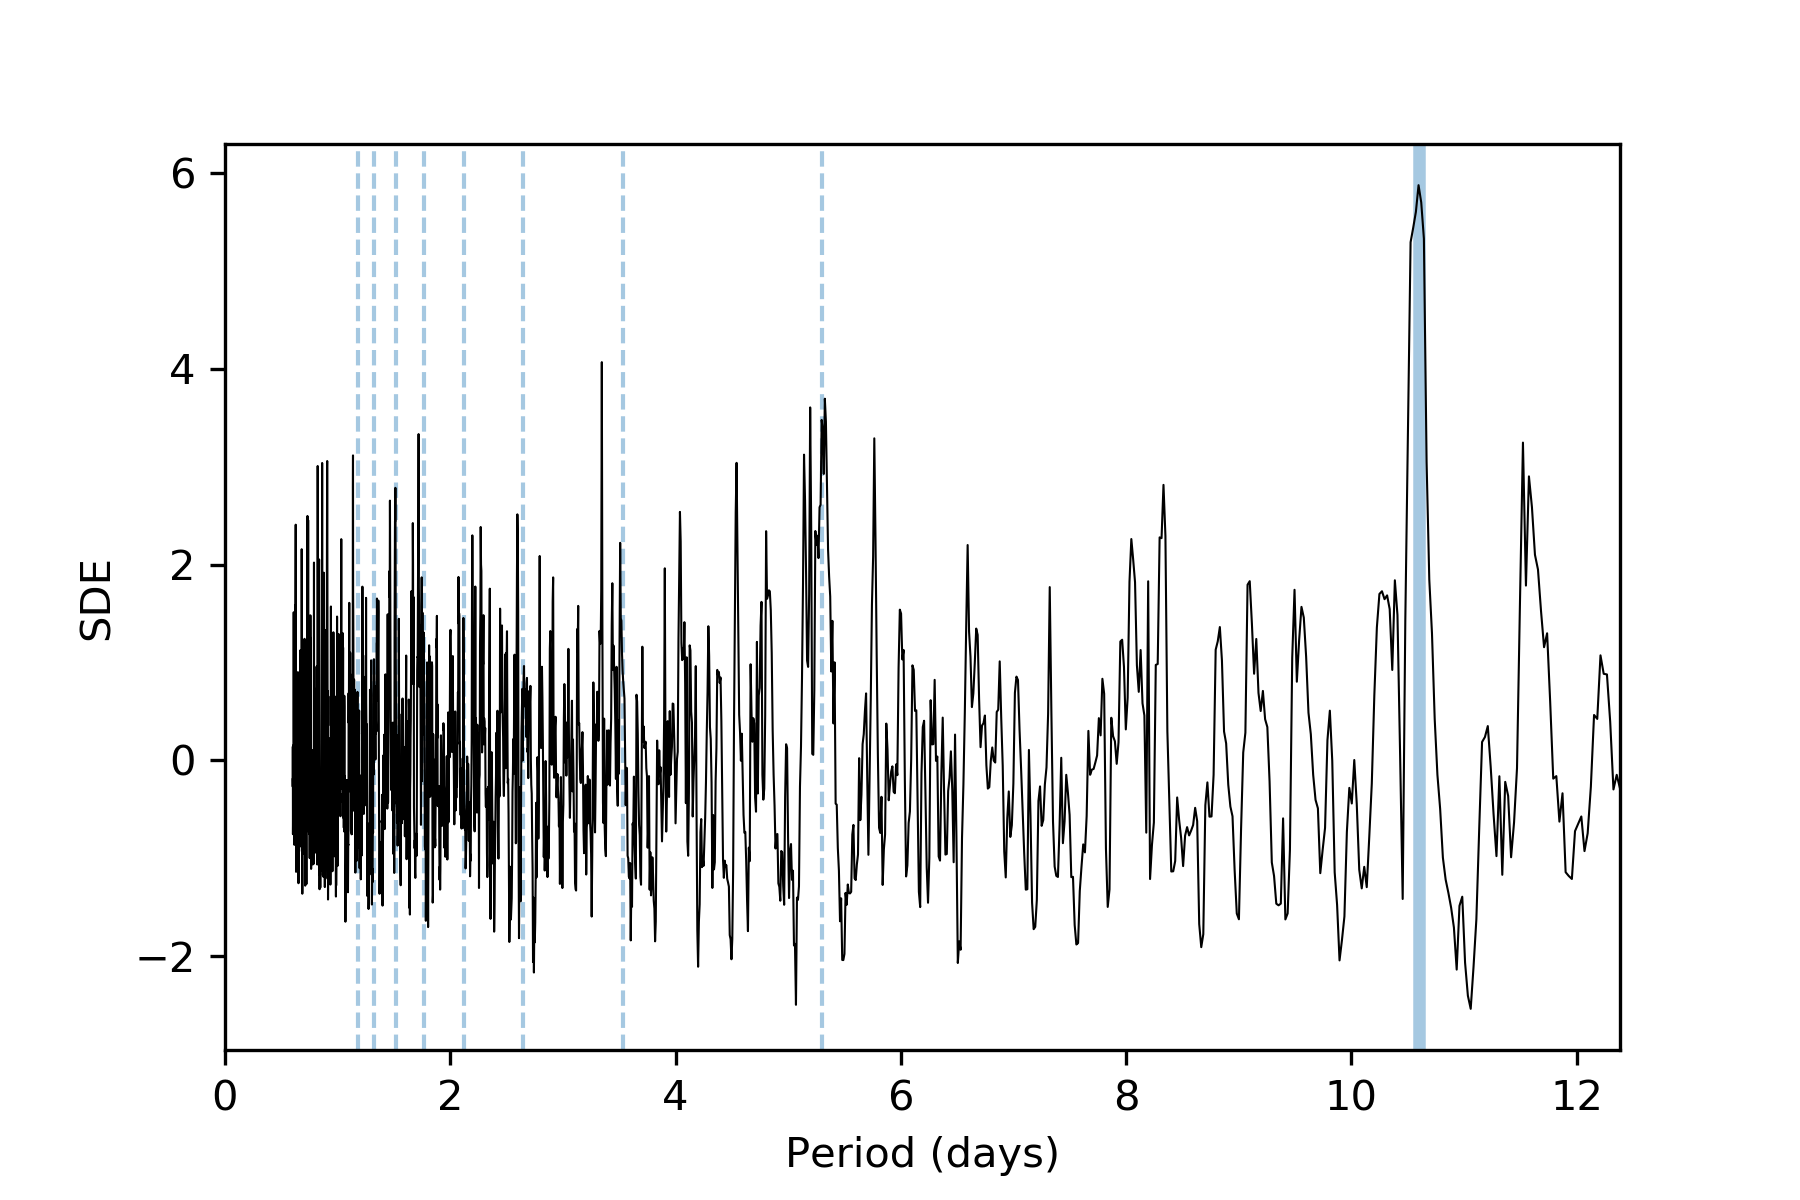

In [17]:
Image(filename='tls_spectrum_after_masking.png')

In [12]:
plt.figure()
plt.plot(
    results_second_run.model_folded_phase,
    results_second_run.model_folded_model,
    color='red')
plt.scatter(
    results_second_run.folded_phase,
    results_second_run.folded_y,
    color='k',
    s=10,
    alpha=0.5,
    zorder=2)
plt.xlim(0.45, 0.55)
plt.xlabel('Phase')
plt.ylabel('Relative flux')
plt.savefig('flux_vs_phase_after_masking.png', dpi=300);

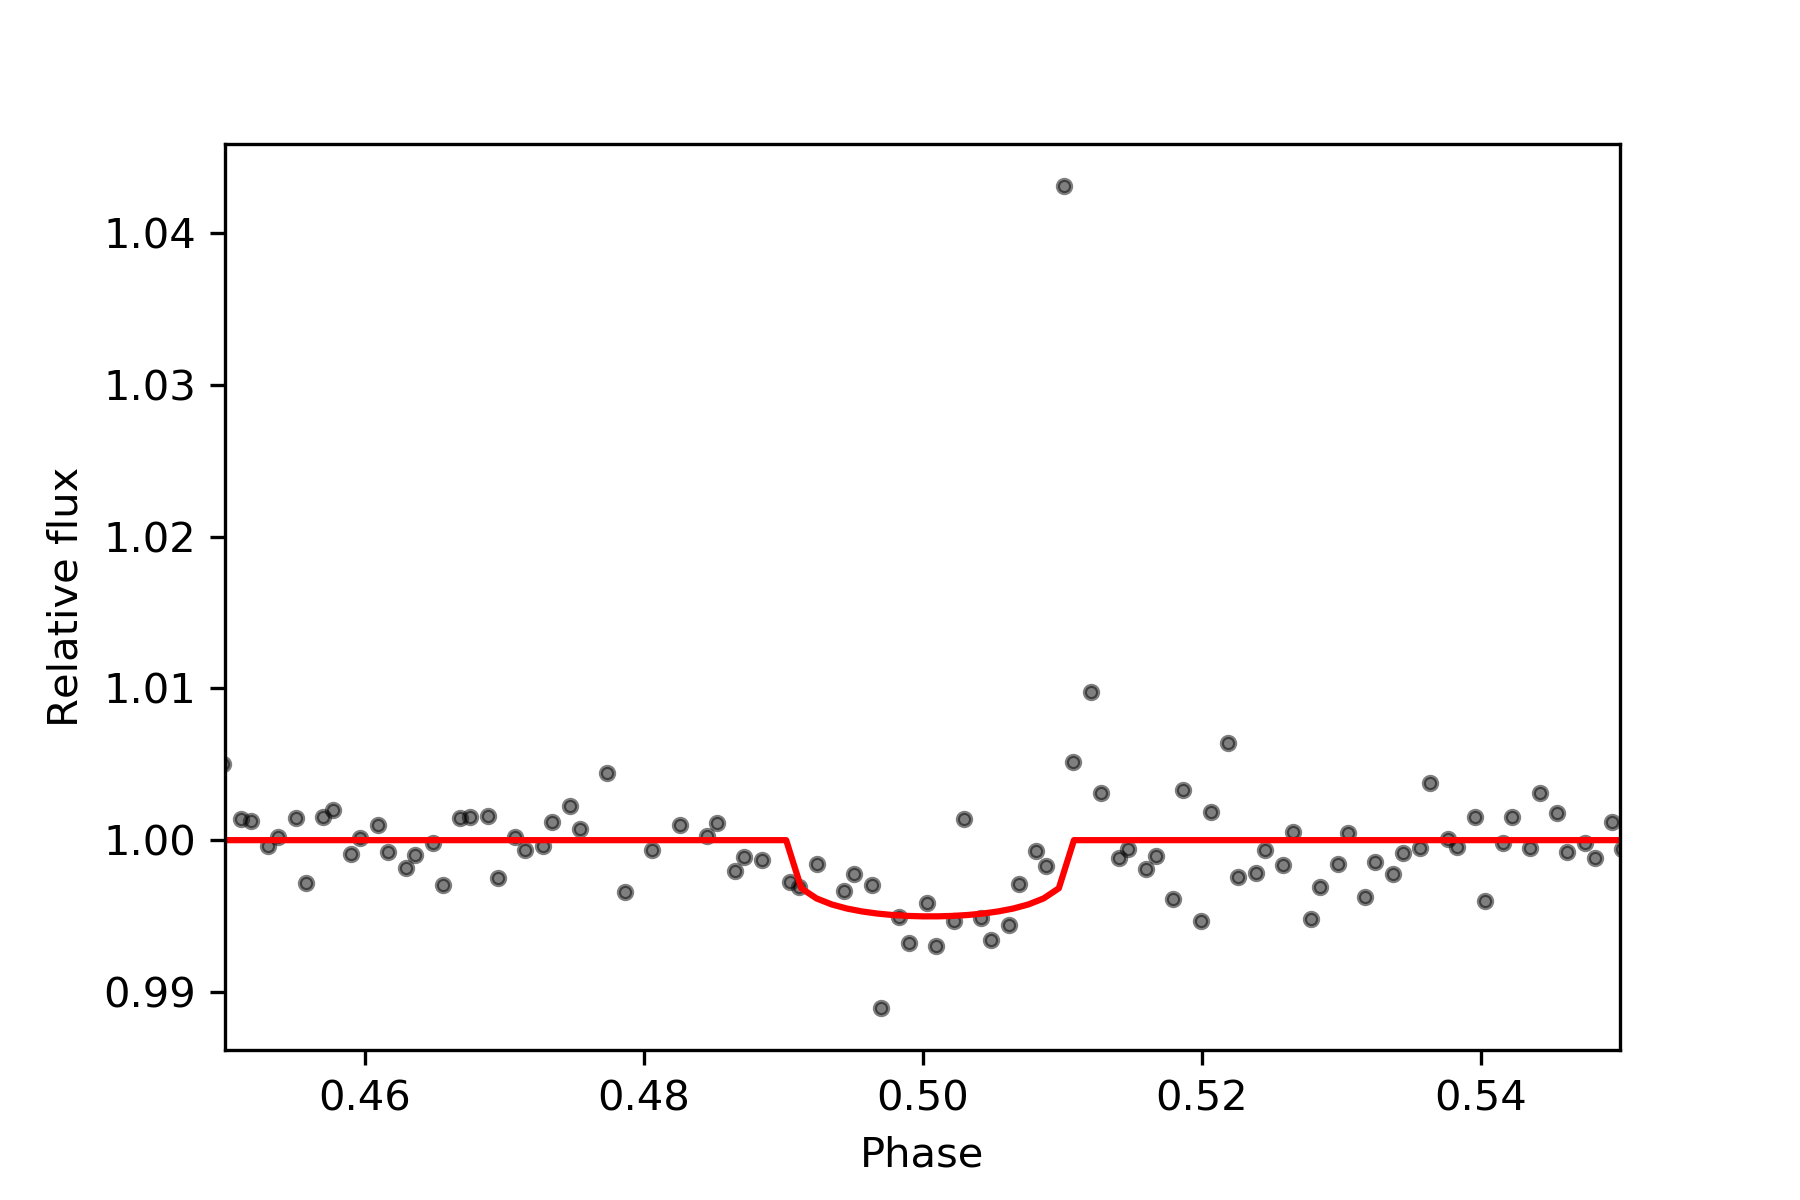

In [18]:
Image(filename='flux_vs_phase_after_masking.png')

In [13]:
plt.figure(figsize=(10,3))
in_transit = transit_mask(
    t_second_run,
    results_second_run.period,
    results_second_run.duration,
    results_second_run.T0)
plt.scatter(
    t_second_run[in_transit],
    y_second_run[in_transit],
    color='red',
    s=2,
    zorder=0)
plt.scatter(
    t_second_run[~in_transit],
    y_second_run[~in_transit],
    color='k',
    alpha=1,
    s=2,
    zorder=2)
plt.plot(
    results_second_run.model_lightcurve_time,
    results_second_run.model_lightcurve_model, alpha=0.5, color='red', zorder=-1, lw=0.5)
plt.xlabel('Time (days)')
plt.ylabel('Relative flux')
plt.savefig('flux_vs_time_after_masking.png', dpi=300);

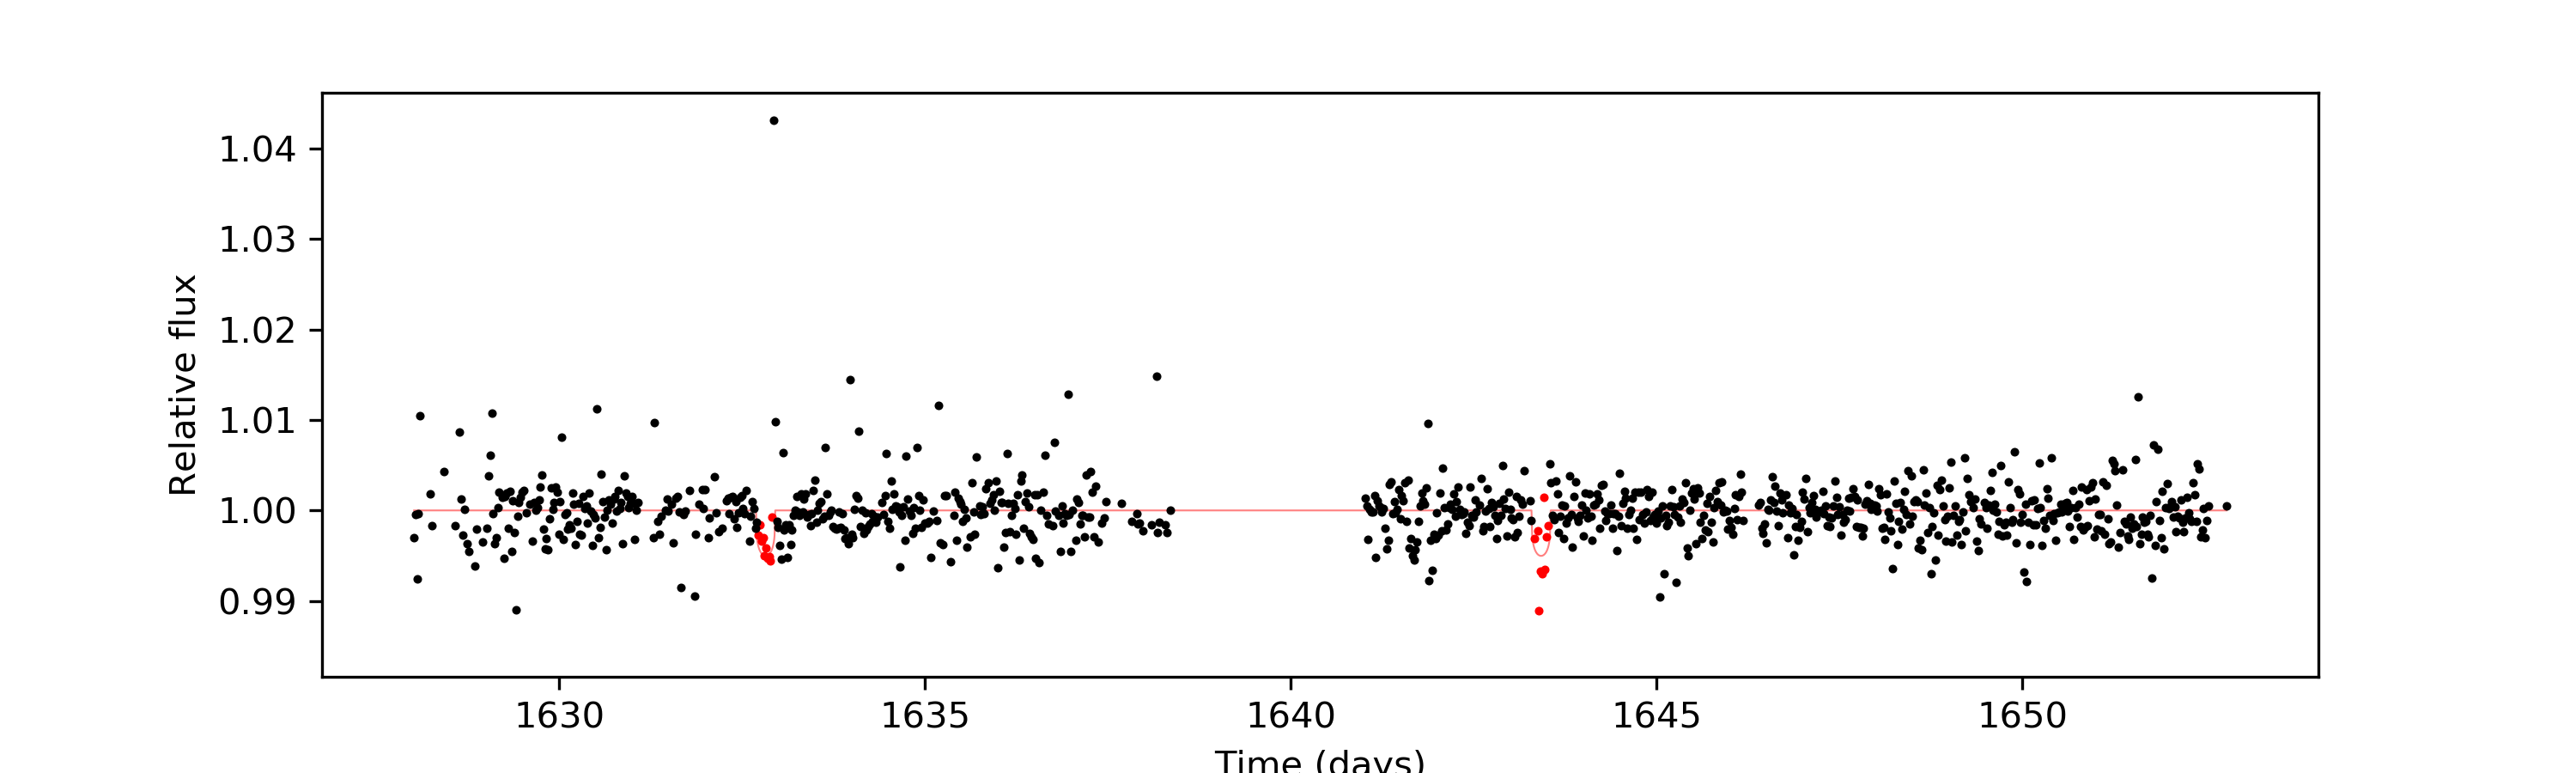

In [19]:
Image(filename='flux_vs_time_after_masking.png')

In [14]:
results_second_run.period

10.59699164671543

In [15]:
results.period

7.5589512136214125

In [ ]:
intransit = transit_mask(t_second_run, results_second_run.period, 2*results_second_run.duration, results_second_run.T0)

y_third_run = y_second_run[~intransit]
t_third_run = t_second_run[~intransit]
t_third_run, y_third_run = cleaned_array(t_third_run, y_third_run)

%matplotlib inline
plt.close('all')
fig, ax = plt.subplots(figsize=(10,3))
ax.scatter(t_third_run, y_third_run, c="k", s=2, zorder=2)
plt.savefig('flux_vs_time_after_masking2.png', dpi=300);

In [ ]:
model_third_run = transitleastsquares(t_third_run, y_third_run)
results_third_run = model_third_run.power()
plt.figure()
ax = plt.gca()
ax.axvline(results_third_run.period, alpha=0.4, lw=3)
plt.xlim(np.min(results_third_run.periods), np.max(results_third_run.periods))
for n in range(2, 10):
    ax.axvline(n*results_third_run.period, alpha=0.4, lw=1, linestyle="dashed")
    ax.axvline(results_third_run.period / n, alpha=0.4, lw=1, linestyle="dashed")
plt.ylabel(r'SDE')
plt.xlabel('Period (days)')
plt.plot(results_third_run.periods, results_third_run.power, color='black', lw=0.5)
plt.xlim(0, max(results_third_run.periods))
plt.savefig('periodogram_after_masking2.png', dpi=300);

In [ ]:
plt.figure()
plt.plot(
    results_third_run.model_folded_phase,
    results_third_run.model_folded_model,
    color='red')
plt.scatter(
    results_third_run.folded_phase,
    results_third_run.folded_y,
    color='blue',
    s=10,
    alpha=0.5,
    zorder=2)
plt.xlim(0.45, 0.55)
plt.xlabel('Phase')
plt.ylabel('Relative flux')
plt.savefig('phasefold_after_masking2.png', dpi=300);

In [ ]:
plt.close('all')
plt.figure(figsize=(10,3))
in_transit = transit_mask(
    t_third_run,
    results_third_run.period,
    results_third_run.duration,
    results_third_run.T0)
plt.scatter(
    t_third_run[in_transit],
    y_third_run[in_transit],
    color='red',
    s=2,
    zorder=0)
plt.scatter(
    t_third_run[~in_transit],
    y_third_run[~in_transit],
    color='k',
    alpha=0.5,
    s=2,
    zorder=0)
plt.plot(
    results_third_run.model_lightcurve_time,
    results_third_run.model_lightcurve_model, alpha=0.5, color='red', zorder=-1, lw=0.5)
plt.xlabel('Time (days)')
plt.ylabel('Relative flux')
plt.savefig('fluxvstime_model_after_masking2.png', dpi=300);